# Problem Statement
Credit score cards are a common risk control method in the financial industry. It uses personal information and data submitted by credit card applicants to predict the probability of future defaults and credit card borrowings. 

What ML model best predicts the probability of a 'good' or 'bad' credit card applicant?

## Step 1 - Importing relevant libraries 

In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

C:\Users\gabws\AppData\Local\Temp\ipykernel_10268\976333922.py:4: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


## Step 2 - Importing dataset 

In [3]:
application_record = pd.read_csv("application_record.csv")
credit_record = pd.read_csv("credit_record.csv")

In [4]:
application_record.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [5]:
credit_record.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [6]:
# since there is 2 csv files, can merge using left join following ID

df = application_record.merge(credit_record, how = "inner")
df


,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,0,C
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-1,C
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-2,C
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-3,C
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-4,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777710,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,Laborers,1.0,-9,0
777711,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,Laborers,1.0,-10,2
777712,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,Laborers,1.0,-11,1
777713,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,Laborers,1.0,-12,0


In [7]:
#check data types with column, does it match? if yes, then no issue
# index 17, could be changed to integer instead of float, to change in Step 3 - data cleaning

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 777715 entries, 0 to 777714
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   777715 non-null  int64  
 1   CODE_GENDER          777715 non-null  object 
 2   FLAG_OWN_CAR         777715 non-null  object 
 3   FLAG_OWN_REALTY      777715 non-null  object 
 4   CNT_CHILDREN         777715 non-null  int64  
 5   AMT_INCOME_TOTAL     777715 non-null  float64
 6   NAME_INCOME_TYPE     777715 non-null  object 
 7   NAME_EDUCATION_TYPE  777715 non-null  object 
 8   NAME_FAMILY_STATUS   777715 non-null  object 
 9   NAME_HOUSING_TYPE    777715 non-null  object 
 10  DAYS_BIRTH           777715 non-null  int64  
 11  DAYS_EMPLOYED        777715 non-null  int64  
 12  FLAG_MOBIL           777715 non-null  int64  
 13  FLAG_WORK_PHONE      777715 non-null  int64  
 14  FLAG_PHONE           777715 non-null  int64  
 15  FLAG_EMAIL       

# Initial thoughts on dataset
- Application records looks to have data that is irrelevant in terms of credit card approval, to drop in data cleaning part
- Some columns could be renamed for easier understand such as index 17
- Index 17 data type should be int instead of float

## Step 3 - EDA and Data Cleaning

In [8]:
df

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,0,C
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-1,C
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-2,C
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-3,C
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-4,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777710,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,Laborers,1.0,-9,0
777711,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,Laborers,1.0,-10,2
777712,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,Laborers,1.0,-11,1
777713,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,Laborers,1.0,-12,0


In [9]:
#converting data type of columns for easier modelling

df1 = df.astype({'CNT_FAM_MEMBERS': np.int64})
df2 = df1.astype({'FLAG_OWN_CAR': 'category'})
df3 = df2.astype({'FLAG_OWN_REALTY':'category'})
df4 = df3.astype({'CODE_GENDER':'category'})

In [10]:
#rechecking our conversion

df4.dtypes

ID                        int64
CODE_GENDER            category
FLAG_OWN_CAR           category
FLAG_OWN_REALTY        category
CNT_CHILDREN              int64
AMT_INCOME_TOTAL        float64
NAME_INCOME_TYPE         object
NAME_EDUCATION_TYPE      object
NAME_FAMILY_STATUS       object
NAME_HOUSING_TYPE        object
DAYS_BIRTH                int64
DAYS_EMPLOYED             int64
FLAG_MOBIL                int64
FLAG_WORK_PHONE           int64
FLAG_PHONE                int64
FLAG_EMAIL                int64
OCCUPATION_TYPE          object
CNT_FAM_MEMBERS           int64
MONTHS_BALANCE            int64
STATUS                   object
dtype: object

In [11]:
#checking for null / missing data
#from here can see that null occupation means unemployed

df4.isnull().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        240048
CNT_FAM_MEMBERS             0
MONTHS_BALANCE              0
STATUS                      0
dtype: int64

In [12]:
#fill missing data with 'unemployed' and recheck

df4['OCCUPATION_TYPE'] = df4['OCCUPATION_TYPE'].fillna(value= 'unemployed')
df4.isnull().sum()

ID                     0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
DAYS_BIRTH             0
DAYS_EMPLOYED          0
FLAG_MOBIL             0
FLAG_WORK_PHONE        0
FLAG_PHONE             0
FLAG_EMAIL             0
OCCUPATION_TYPE        0
CNT_FAM_MEMBERS        0
MONTHS_BALANCE         0
STATUS                 0
dtype: int64

In [13]:
#checking for duplicated data 

df4.duplicated()
df4.duplicated().sum()

0         False
1         False
2         False
3         False
4         False
          ...  
777710    False
777711    False
777712    False
777713    False
777714    False
Length: 777715, dtype: bool

0

In [14]:
df4.describe()
df4.shape

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,MONTHS_BALANCE
count,7.777150e+05,777715.000000,7.777150e+05,777715.000000,777715.000000,777715.0,777715.000000,777715.000000,777715.000000,777715.000000,777715.000000
mean,5.078743e+06,0.428082,1.885348e+05,-16124.937046,57775.825016,1.0,0.231818,0.300965,0.091675,2.208837,-19.373564
std,4.180442e+04,0.745755,1.016225e+05,4104.304018,136471.735391,0.0,0.421993,0.458678,0.288567,0.907380,14.082208
min,5.008804e+06,0.000000,2.700000e+04,-25152.000000,-15713.000000,1.0,0.000000,0.000000,0.000000,1.000000,-60.000000
25%,5.044568e+06,0.000000,1.215000e+05,-19453.000000,-3292.000000,1.0,0.000000,0.000000,0.000000,2.000000,-29.000000
50%,5.069530e+06,0.000000,1.620000e+05,-15760.000000,-1682.000000,1.0,0.000000,0.000000,0.000000,2.000000,-17.000000
75%,5.115551e+06,1.000000,2.250000e+05,-12716.000000,-431.000000,1.0,0.000000,1.000000,0.000000,3.000000,-8.000000
max,5.150487e+06,19.000000,1.575000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000,0.000000


(777715, 20)

In [15]:
#dropping columns that are not relevant to the ML model

df5 = df4.drop(['FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL'], axis=1)
df5

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,unemployed,2,0,C
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,unemployed,2,-1,C
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,unemployed,2,-2,C
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,unemployed,2,-3,C
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,unemployed,2,-4,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777710,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,Laborers,1,-9,0
777711,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,Laborers,1,-10,2
777712,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,Laborers,1,-11,1
777713,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,Laborers,1,-12,0


In [16]:
df5['STATUS'].unique()

#0: 1-29 days past due, which is ok 
#1: 30-59 days past due 
#2: 60-89 days overdue 
#3: 90-119 days overdue 
#4: 120-149 days overdue 
#5: Overdue or bad debts, write-offs for more than 150 days 
#C: paid off that month, which is ok
#X: No loan for the month, which is ok

array(['C', '1', '0', 'X', '5', '4', '3', '2'], dtype=object)

In [17]:
#mapping datas in STATUS to an int

def status(s):
    
    if s == "C":
        return 0
    elif s == "X":
        return 0
    elif s == '0':
        return 0
    elif s == '1':
        return 0
    elif s == '2':
        return 1
    elif s == '3':
        return 1
    elif s == '4':
        return 1
    elif s == '5':
        return 1
    
#0 is good
#1 is bad / overdue

In [18]:
#(lambda arguments : expression)
#transform every rows in the column STATUS, running the function defined as status above 

df5['STATUS'] = df5['STATUS'].apply(lambda x:status(x))

In [19]:
#le = preprocessing.LabelEncoder()
#df['label'] = le.fit_transform(df.label.values)

from sklearn import preprocessing
  
le = preprocessing.LabelEncoder()

df5['CODE_GENDER']= le.fit_transform(df5['CODE_GENDER'])
df5['FLAG_OWN_CAR']= le.fit_transform(df5['FLAG_OWN_CAR'])
df5['FLAG_OWN_REALTY']= le.fit_transform(df5['FLAG_OWN_REALTY'])
df5['NAME_INCOME_TYPE']= le.fit_transform(df5['NAME_INCOME_TYPE'])
df5['NAME_FAMILY_STATUS']= le.fit_transform(df5['NAME_FAMILY_STATUS'])
df5['NAME_HOUSING_TYPE']= le.fit_transform(df5['NAME_HOUSING_TYPE'])
df5['NAME_EDUCATION_TYPE']= le.fit_transform(df5['NAME_EDUCATION_TYPE'])

In [20]:
df5.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,unemployed,2,0,0
1,5008804,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,unemployed,2,-1,0
2,5008804,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,unemployed,2,-2,0
3,5008804,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,unemployed,2,-3,0
4,5008804,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,unemployed,2,-4,0


# Step 4 - Visualization of Data

In [21]:
df5[['AMT_INCOME_TOTAL','DAYS_EMPLOYED','MONTHS_BALANCE']].corr()

# not meaningful to show

,AMT_INCOME_TOTAL,DAYS_EMPLOYED,MONTHS_BALANCE
AMT_INCOME_TOTAL,1.000000,-0.180674,0.001831
DAYS_EMPLOYED,-0.180674,1.000000,-0.004222
MONTHS_BALANCE,0.001831,-0.004222,1.000000


<AxesSubplot:>

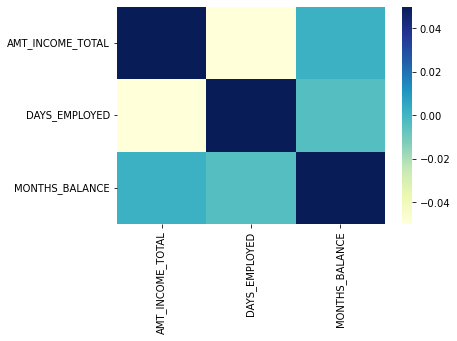

In [22]:
sns.heatmap(df5[['AMT_INCOME_TOTAL','DAYS_EMPLOYED','MONTHS_BALANCE']].corr(),
            cmap='YlGnBu',
            vmin=-0.05, vmax=0.05
           )

# Step 5 - Split X and y into training and testing sets

In [23]:
df5.info()
df5.columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 777715 entries, 0 to 777714
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   777715 non-null  int64  
 1   CODE_GENDER          777715 non-null  int32  
 2   FLAG_OWN_CAR         777715 non-null  int32  
 3   FLAG_OWN_REALTY      777715 non-null  int32  
 4   CNT_CHILDREN         777715 non-null  int64  
 5   AMT_INCOME_TOTAL     777715 non-null  float64
 6   NAME_INCOME_TYPE     777715 non-null  int32  
 7   NAME_EDUCATION_TYPE  777715 non-null  int32  
 8   NAME_FAMILY_STATUS   777715 non-null  int32  
 9   NAME_HOUSING_TYPE    777715 non-null  int32  
 10  DAYS_BIRTH           777715 non-null  int64  
 11  DAYS_EMPLOYED        777715 non-null  int64  
 12  OCCUPATION_TYPE      777715 non-null  object 
 13  CNT_FAM_MEMBERS      777715 non-null  int64  
 14  MONTHS_BALANCE       777715 non-null  int64  
 15  STATUS           

Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'MONTHS_BALANCE',
       'STATUS'],
      dtype='object')

In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['AMT_INCOME_TOTAL','DAYS_EMPLOYED','MONTHS_BALANCE']]=scaler.fit_transform(df[['AMT_INCOME_TOTAL','DAYS_EMPLOYED','MONTHS_BALANCE']])

In [25]:
# STEP 1: split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df5[['CODE_GENDER', 
                                                         'FLAG_OWN_CAR', 
                                                         'FLAG_OWN_REALTY',
                                                         'AMT_INCOME_TOTAL', 
                                                         'NAME_INCOME_TYPE', 
                                                         'NAME_EDUCATION_TYPE',
                                                         'NAME_FAMILY_STATUS',
                                                         'NAME_HOUSING_TYPE',
                                                         'DAYS_EMPLOYED',
                                                         'MONTHS_BALANCE']], 
                                                        df['STATUS'], random_state=99)




# Step 6 - Running KNN Model

In [26]:
# STEP 2: train the model on the training set (using K=1)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [27]:
# STEP 3: test the model on the testing set, and check the accuracy
y_pred_class = knn.predict(X_test)

#checking accuracy between test set and predicted set
print(accuracy_score(y_test, y_pred_class))

0.55515895262538


In [28]:
# test with 5 neighbors

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred_class = knn.predict(X_test)
print(accuracy_score(y_test, y_pred_class))

KNeighborsClassifier()

0.6180508051782398


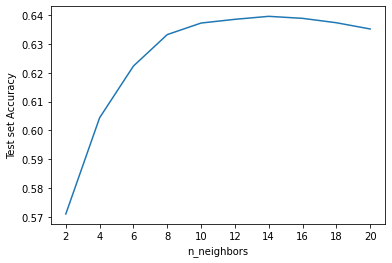

In [29]:
scores = []

for n in range(2,21,2):
    knn = KNeighborsClassifier(n_neighbors=n)
    _ = knn.fit(X_train, y_train) 
    
    y_pred_class = knn.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred_class))
    
_ = plt.plot(scores)                                       #_ to mute the outputs
_ = plt.xticks(ticks=range(10),labels=range(2,20+1,2))     #_ to mute the outputs
_ = plt.xlabel('n_neighbors')
_ = plt.ylabel('Test set Accuracy')

In [30]:
# test with 14 neighbors, estimated to be best accuracy from plot above

knn = KNeighborsClassifier(n_neighbors=14)
knn.fit(X_train, y_train)

y_pred_class = knn.predict(X_test)
print(accuracy_score(y_test, y_pred_class))

KNeighborsClassifier(n_neighbors=14)

0.6396010883150147


# Step 7 - Running Decision Tree Model

In [31]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

dt.fit(X_train, y_train)

y_preds = dt.predict(X_test)

print(accuracy_score(y_test, y_preds))

DecisionTreeClassifier()

0.5741581759922645


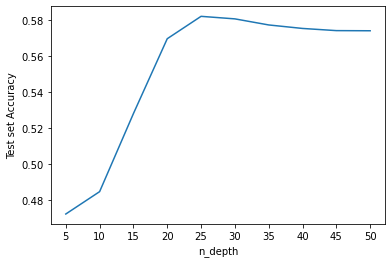

In [32]:
scores = []

for n in range(5,51,5):
    dt = DecisionTreeClassifier(max_depth=n)
    _ = dt.fit(X_train, y_train) 
    
    y_preds = dt.predict(X_test)
    
    scores.append(accuracy_score(y_test, y_preds))
    
_ = plt.plot(scores)                                       #_ to mute the outputs
_ = plt.xticks(ticks=range(10),labels=range(5,51,5))     #_ to mute the outputs
_ = plt.xlabel('n_depth')
_ = plt.ylabel('Test set Accuracy')

In [33]:
# test with max depth = 25, estimated to be best accuracy from plot above

dt = DecisionTreeClassifier(max_depth = 25)

dt.fit(X_train, y_train)

y_preds = dt.predict(X_test)

print(accuracy_score(y_test, y_preds))

DecisionTreeClassifier(max_depth=25)

0.5819347936778978


# Summary
## Findings
- Accuracy score for KNN model after tuning hyperparameters is 0.6396.
- Accuracy score for Decision Tree model after tuning hyperparameters is 0.5821.
- The KNN model performed better in predicting 

## Limitations of dataset
- Correlation between data is very low could be due to data is unclean.